In [1]:
#data loading
import pandas as pd

predata = pd.read_csv(r'C:/Users/BeatrizCarvalho/OneDrive - Closer Consultoria Lda/Documents/Entangled-Spaces/Datasets/0transfers_nd_corr.csv', low_memory = False) 

In [2]:
#make sure the dataframes were well selected
counts = predata['is_fraud'].value_counts()
counts

0    7112
1     569
Name: is_fraud, dtype: int64

In [5]:
#ratios of each class
counts / predata.shape[0]

0    0.526228
1    0.473772
Name: is_fraud, dtype: float64

In [6]:
#inicial number of columns and rows of the dataframe
predata.shape

(1201, 20)

In [6]:
#visualize the whole output
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#create column weekday
predata['weekday'] = pd.to_datetime(predata['timestamp']).apply(lambda x: x.weekday())

In [8]:
#create column month
predata['month'] = pd.DatetimeIndex(predata['timestamp']).month

In [9]:
#drop column timestamp that was used for creating weekday and month
predata.drop(['timestamp'], axis = 1, inplace = True)

In [3]:
#renaming browsers
def assign_brws_fam(x):

    changes = {
        "m bot": "other",  #15
        "android": "other",  #104
        "1password": "other",  #57
        "chrome mobile": "chrome",  #735168
        "chrome mobile webview": "chrome",  #2681
        "mobile safari": "safari",  #338413
        "mobile safari ui/wkwebview": "safari",  #4190964
        "firefox mobile": "firefox",  #5515
        "edge mobile": "edge",
        "firefox mobile": "firefox"
    }

    if x in changes.keys():
        return changes[x]
    else:
        return x

predata["browser_family"] = predata["browser_family"].apply(lambda x: assign_brws_fam(x))

In [4]:
#renaming os 
def assign_os_fam(x):

    changes = {
        "windows phone": "windows"  #863
    }

    if x in changes.keys():
        return changes[x]
    else:
        return x

predata["os_family"] = predata["os_family"].apply(lambda x: assign_os_fam(x))

In [12]:
#remove spaces on browsers and os 
cols = ['os_family', 'browser_family']

for col in cols:
      predata[col] = predata[col].apply(lambda x: x.replace(' ', ''))

In [13]:
#make all lowercase
def convert_column_lower(column, df):
    df[column] = df[column].str.lower()
    
columns_to_lower = ['canal', 'operativa', 'browser_family', 'os_family', 'ipaddress', 'trusted_indicator']
for col in columns_to_lower:
    predata[col] = predata[col].str.lower()

In [14]:
#remove dots from ipaddress
predata['ipaddress'] = predata['ipaddress'].apply(lambda x: "".join(x.split(".")))

In [ ]:
#merge is_tablet, is_pc, is_mobile, is_touch on a new device column
#takes the 1st true that appears
def deviceselect(x): 
    #if True in tablet and touch
    if x['is_tablet'] and x['is_touch']:
       return 'ttablet'
    
    #if True in pc and touch
    if x['is_pc'] and x['is_touch']:
       return 'tpc'
    
    #if True in mobile and touch
    if x['is_mobile'] and x['is_touch']:
       return 'tmobile'

    #if True only in mobile
    if x['is_mobile']:
        return 'mobile'
    
    #if True only in pc
    if x['is_pc']:
        return 'pc'

    #if True only in tablet
    if x['is_tablet']:
        return 'tablet'  
    
    #if all false return otherd
    return 'otherd'                            
    
predata['device'] = predata.apply(deviceselect, axis = 1)

In [14]:
#drop columns that were merged on the new device column
predata.drop(['is_pc', 'is_tablet', 'is_mobile', 'is_touch'], axis = 1, inplace = True)  

In [15]:
#final number of columns and rows of the dataframe
predata.shape

(8000569, 19)

In [26]:
#final columns of the dataframe
predata.columns

Index(['timestamp', 'canal', 'operativa', 'clientid', 'entity', 'reference',
       'trusted_indicator', 'iban_orig', 'iban_dest', 'amount',
       'accountbalance', 'ipaddress', 'browser_family', 'os_family', 'hour',
       'week', 'weekday', 'month', 'device', 'is_fraud'],
      dtype='object')

<AxesSubplot:xlabel='hour', ylabel='amount'>

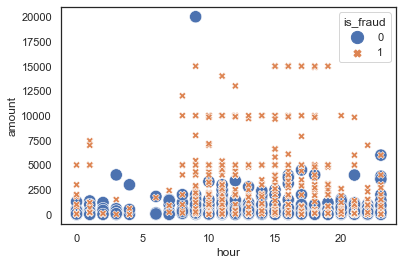

In [76]:
#plot the imbalanced dataset with seaborn - amount vs hour
import seaborn as sns

#select the features
df = predata[['hour', 'amount', 'is_fraud']]

#figure size
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

#plot
sns.set_theme(style = 'white')
#hue - gives a different color based on the label; style - gives a different marker (point shape) based on the label; 
#size - gives different based on the label
sns.scatterplot(data = df, x = 'hour', y = 'amount', hue = 'is_fraud', style = 'is_fraud', size = 'is_fraud', sizes = (50, 150))

<AxesSubplot:xlabel='operativa', ylabel='amount'>

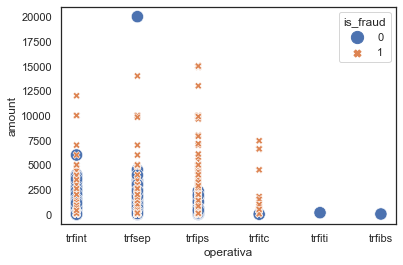

In [80]:
#plot the imbalanced dataset with seaborn - amount vs operativa
import seaborn as sns

#select the features
df = predata[['operativa', 'amount', 'is_fraud']]

#figure size
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

#plot
sns.set_theme(style = 'white')
#hue - gives a different color based on the label; style - gives a different marker (point shape) based on the label; 
#size - gives different based on the label
sns.scatterplot(data = df, x = 'operativa', y = 'amount', hue = 'is_fraud', style = 'is_fraud', size = 'is_fraud', sizes = (50, 150))

<AxesSubplot:xlabel='os_family', ylabel='amount'>

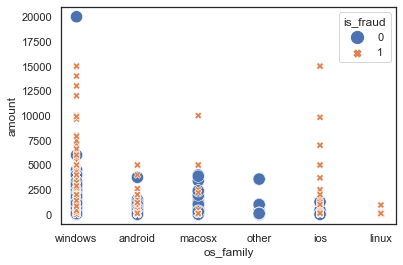

In [82]:
#plot the imbalanced dataset with seaborn - amount vs os_family
import seaborn as sns

#select the features
df = predata[['os_family', 'amount', 'is_fraud']]

#figure size
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

#plot
sns.set_theme(style = 'white')
#hue - gives a different color based on the label; style - gives a different marker (point shape) based on the label; 
#size - gives different based on the label
sns.scatterplot(data = df, x = 'os_family', y = 'amount', hue = 'is_fraud', style = 'is_fraud', size = 'is_fraud', sizes = (50, 150))

<AxesSubplot:xlabel='browser_family', ylabel='amount'>

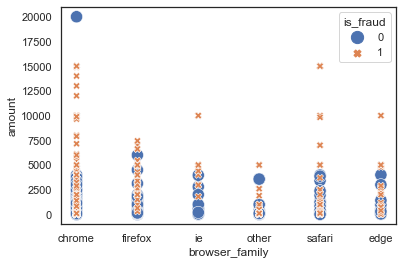

In [83]:
#plot the imbalanced dataset with seaborn - amount vs browser_family
import seaborn as sns

#select the features
df = predata[['browser_family', 'amount', 'is_fraud']]

#figure size
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

#plot
sns.set_theme(style = 'white')
#hue - gives a different color based on the label; style - gives a different marker (point shape) based on the label; 
#size - gives different based on the label
sns.scatterplot(data = df, x = 'browser_family', y = 'amount', hue = 'is_fraud', style = 'is_fraud', size = 'is_fraud', sizes = (50, 150))

<AxesSubplot:xlabel='device', ylabel='amount'>

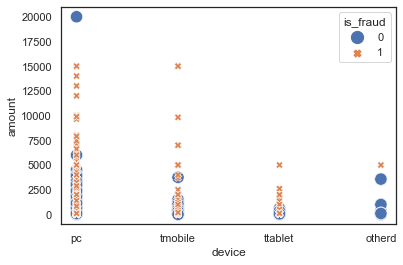

In [84]:
#plot the imbalanced dataset with seaborn - amount vs device
import seaborn as sns

#select the features
df = predata[['device', 'amount', 'is_fraud']]

#figure size
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

#plot
sns.set_theme(style = 'white')
#hue - gives a different color based on the label; style - gives a different marker (point shape) based on the label; 
#size - gives different based on the label
sns.scatterplot(data = df, x = 'device', y = 'amount', hue = 'is_fraud', style = 'is_fraud', size = 'is_fraud', sizes = (50, 150))

(-10.0, 80000.0)

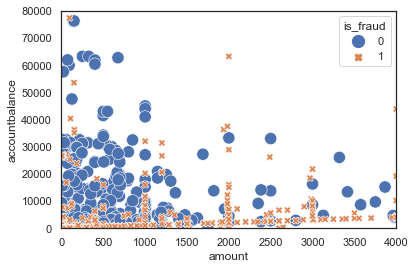

In [105]:
#plot the imbalanced dataset with seaborn - amount vs accountbalance
import seaborn as sns

#select the features
df = predata[['accountbalance', 'amount', 'is_fraud']]

#figure size
from matplotlib import rcParams
rcParams['figure.figsize'] = 6, 4

#plot
sns.set_theme(style = 'white')
#hue - gives a different color based on the label; style - gives a different marker (point shape) based on the label; 
#size - gives different based on the label
scatter = sns.scatterplot(data = df, x = 'amount', y = 'accountbalance', hue = 'is_fraud', style = 'is_fraud', size = 'is_fraud', 
                          sizes = (50, 150))
scatter.set_xlim(left = 0, right = 4000)
scatter.set_ylim(bottom = 0, top = 80000)

In [292]:
#plot the imbalanced dataset with PCA - part 1
import plotly.express as px
from sklearn.decomposition import PCA

#select the data
X = predata[['amount', 'hour', 'accountbalance', 'trusted_indicator', 'week', 'weekday', 'month']]

#PCA
pca = PCA(n_components = 2)
components = pca.fit_transform(X)

#plot
fig = px.scatter(components, x = 0, y = 1, color = predata['is_fraud'], symbol = predata['is_fraud'], template = "simple_white",
                symbol_sequence = ['circle', 'x-open'], color_discrete_sequence = ['green', 'steelblue'])

#markers size
fig.update_traces(marker_size = 7)

#shape of figure and labels
fig.update_layout(autosize = False, width = 400, height = 300, yaxis_title = 'Component 2', xaxis_title = 'Component 1', 
                  coloraxis_showscale = False, legend_title = "")

fig.show()

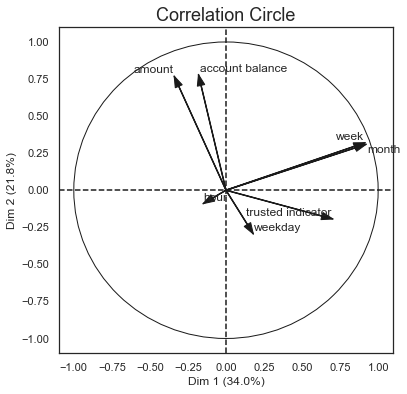

In [255]:
#plot the correlation circle from PCA - part 2
from mlxtend.plotting import plot_pca_correlation_graph
from sklearn.preprocessing import StandardScaler

#normalizing the feature columns by (X - mean) / std
X_norm = StandardScaler().fit_transform(X)

#features
variables_names = ['amount', 'hour', 'account balance', 'trusted indicator', 'week', 'weekday', 'month']

#plot
fig, correlation_matrix = plot_pca_correlation_graph(X_norm, variables_names = variables_names, dimensions = (1, 2), figure_axis_size = 6)

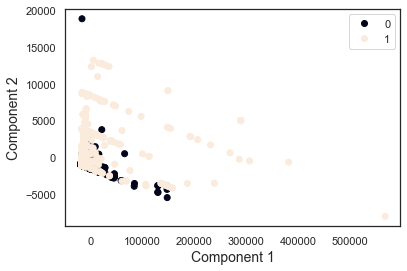

In [332]:
#plot the balanced dataset with PCA - part 1    
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

#target column
y = predata['is_fraud'] 

#columns with continuous values
X = predata[['amount', 'hour', 'accountbalance', 'trusted_indicator', 'week', 'weekday', 'month']]

#PCA
pca = PCA()
Xt = pca.fit_transform(X)

#plot
plot = plt.scatter(Xt[:, 0], Xt[:, 1], c = y, marker = 'o') 
plt.xlabel('Component 1', fontsize = 14)
plt.ylabel('Component 2', fontsize = 14)
plt.legend(handles = plot.legend_elements()[0], labels = ['0', '1'])  

plt.show()

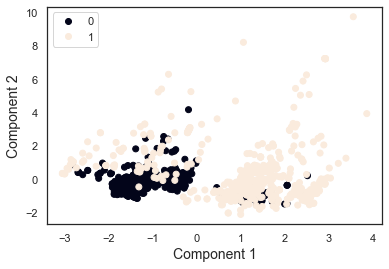

In [334]:
#plot the balanced dataset with PCA and Scaler - part 2
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#scale data before PCA
pipe = Pipeline([('scaler', StandardScaler()), ('pca', pca)])
Xt = pipe.fit_transform(X)

#plot
plot = plt.scatter(Xt[:, 0], Xt[:, 1], c = y)
plt.xlabel('Component 1', fontsize = 14)
plt.ylabel('Component 2', fontsize = 14)
plt.legend(handles = plot.legend_elements()[0], labels = ['0', '1'])  #before labels = list(predata['is_fraud'])

plt.show()

In [106]:
#view the dataframe
predata.head()

,timestamp,canal,operativa,clientid,entity,reference,trusted_indicator,iban_orig,iban_dest,amount,accountbalance,ipaddress,browser_family,os_family,hour,week,weekday,month,device,is_fraud
0,2019-08-25 11:00:02,nbp,trfint,194,3,3,1.0,196,1259555,2000.00,2756.32,85247635,chrome,windows,11,34,6,8,pc,0
1,2019-08-11 10:14:31,nbp,trfint,713,3,3,1.0,208502,360833,20.00,572.91,1888330187,chrome,windows,10,32,6,8,pc,0
2,2019-09-01 15:11:23,nbp,trfint,530,3,3,1.0,1330685,1330686,2500.00,33009.46,94615920,chrome,windows,15,35,6,9,pc,0
3,2019-08-05 14:12:44,nbp,trfsep,259,3,3,1.0,262,514705,92.25,3169.51,6228194102,firefox,windows,14,32,0,8,pc,0
4,2019-09-05 17:06:08,nbp,trfsep,194,3,3,0.0,196,1760802,2000.00,3774.67,85247635,chrome,windows,17,36,3,9,pc,0


In [2]:
#change data types for columns that need to be categorical
convert_dict = {'clientid': object, 'entity': object, 'reference': object, 'iban_orig': object, 'iban_dest': object, 
                'hour': object, 'week': object, 'weekday': object, 'month': object}

predata = predata.astype(convert_dict)

In [340]:
#number of lines, null/nan values and type of each column
predata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1201 entries, 0 to 1200
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   canal              1201 non-null   object 
 1   operativa          1201 non-null   object 
 2   clientid           1201 non-null   object 
 3   entity             1201 non-null   object 
 4   reference          1201 non-null   object 
 5   trusted_indicator  1201 non-null   float64
 6   iban_orig          1201 non-null   object 
 7   iban_dest          1201 non-null   object 
 8   amount             1201 non-null   float64
 9   accountbalance     1201 non-null   float64
 10  ipaddress          1201 non-null   object 
 11  browser_family     1201 non-null   object 
 12  os_family          1201 non-null   object 
 13  hour               1201 non-null   object 
 14  week               1201 non-null   object 
 15  weekday            1201 non-null   object 
 16  month              1201 

In [3]:
#balance the dataset

#undersampling -> RandomUnderSampler
from imblearn.under_sampling import RandomUnderSampler

under = RandomUnderSampler(sampling_strategy = {0: 600 , 1: 569})  

#oversampling -> Smote-NC
from imblearn.over_sampling import SMOTENC
                                                                    
#target column
y = predata['is_fraud']  #series

#all the other columns
X = predata.drop('is_fraud', axis = 1)  #dataframe

#specify the categorical columns for smotenc
smotenc = SMOTENC(categorical_features = [X.dtypes == object])  

In [4]:
#pipeline
from imblearn.pipeline import Pipeline
steps = [('u', under), ('o', smotenc)]
pipeline = Pipeline(steps = steps)

In [5]:
#resample X and y 
X, y = pipeline.fit_resample(X, y)

In [6]:
#create the new dataframe
predatabalanced = X.copy()
predatabalanced['is_fraud'] = y

In [346]:
#columns of the new dataframe
predatabalanced.columns

Index(['canal', 'operativa', 'clientid', 'entity', 'reference',
       'trusted_indicator', 'iban_orig', 'iban_dest', 'amount',
       'accountbalance', 'ipaddress', 'browser_family', 'os_family', 'hour',
       'week', 'weekday', 'month', 'device', 'is_fraud'],
      dtype='object')

In [347]:
#columns and rows of the new dataframe
predatabalanced.shape

(1200, 19)

In [348]:
#check the new data distribution
counts_n = predatabalanced['is_fraud'].value_counts()
counts_n

0    600
1    600
Name: is_fraud, dtype: int64

ValueError: The number of FixedLocator locations (1786), usually from a call to set_ticks, does not match the number of ticklabels (1143).

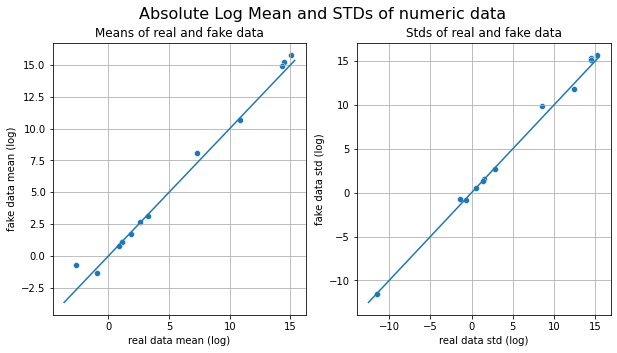

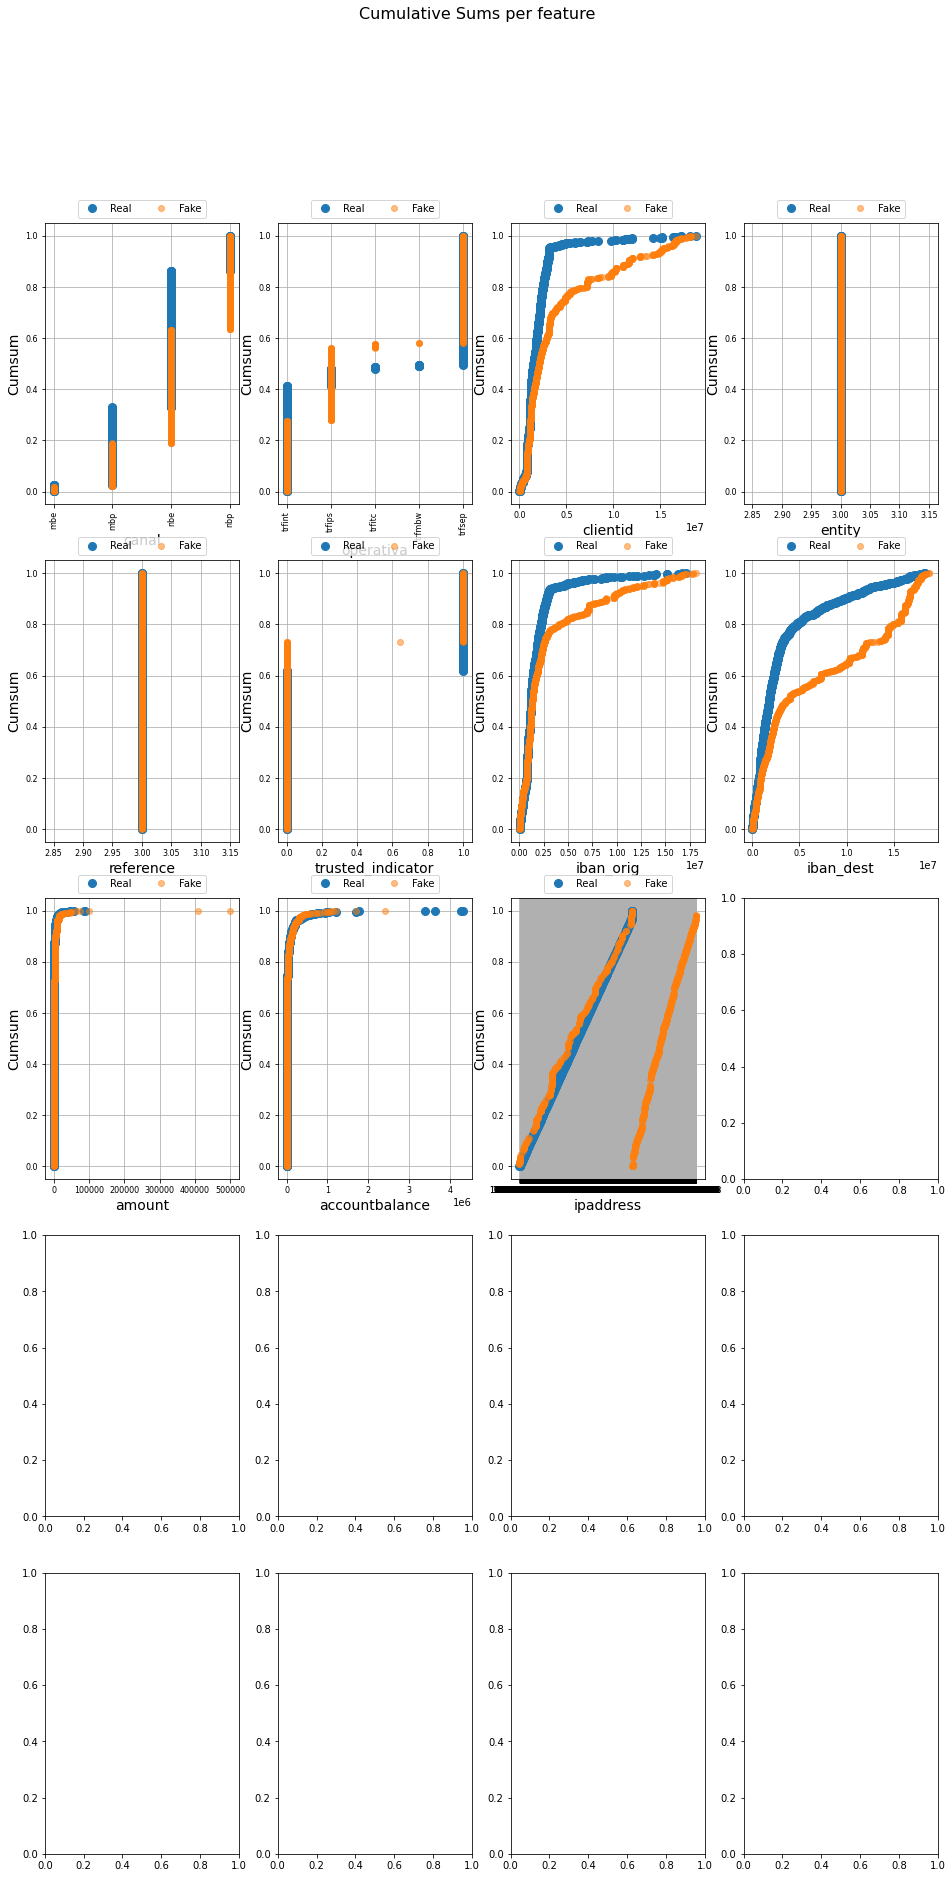

In [8]:
#evaluate how similar the two dataframes are by graphics 
from table_evaluator import TableEvaluator

table_evaluator =  TableEvaluator(predata, predatabalanced) 

table_evaluator.visual_evaluation()

In [26]:
#save the balanced dataset
predatabalanced.to_csv(r'C:/Users/BeatrizCarvalho/OneDrive - Closer Consultoria Lda/Documents/Entangled-Spaces/Datasets/2transfers_balanced_smote+rund.csv', index = False)

In [28]:
#new class ratios
counts_n / predatabalanced.shape[0]

0    0.5
1    0.5
Name: is_fraud, dtype: float64

In [28]:
#profiling of the data
from pandas_profiling import ProfileReport

#ProfileReport(predata.sample(n = 10000)) for much data - it randomizes data order and selects representative sample
prof = ProfileReport(predatabalanced, minimal = True)             
prof.to_file(output_file = r'C:/Users/BeatrizCarvalho/OneDrive - Closer Consultoria Lda/Documents/Entangled-Spaces/Profiles/2transfers_balanced_smote+rund.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [29]:
#select all transfers frauds after balance and save in a csv file
#transfers frauds
target_col = 'is_fraud'
frauds_transfers = predatabalanced[(predatabalanced[target_col] == 1)].copy()

#save csv file
frauds_transfers.to_csv(r'C:/Users/BeatrizCarvalho/OneDrive - Closer Consultoria Lda/Documents/Entangled-Spaces/Datasets/2frauds_transfers_balanced_smote+rund.csv', index = False)

In [ ]:
#graphs